In [19]:
import pandas as pd
import seaborn as sns
import statistics
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.patches as mpatches
# rc('font',**{'family':'serif','serif':['Palatino']})
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42

In [13]:
selective_chemID_list= ['100000257','1114','100001987','100006438','100004208','100020536'
                        ,'250','100020253','100001950','100001624','100020578']

selective_chem_list = ['Glucuronate','3-aminoisobutyrate','5alpha-androstan-3beta,17beta-diol disulfate',
                       'Citraconate_glutaconate','Guaiacol sulfate','4-ethylcatechol sulfate','Biliverdin',
                       'Glycine conjugate of C10H12O2','Bilirubin (E,E)','3-(3-hydroxyphenyl)propionate',
                       '4-allylcatechol sulfate']

pvalue_list = [0.0012, 0.0022, 0.0175, 0.0184 , 0.0075, 0.0146, 0.0017, 0.0069, 0.002, 0.0134, 0.0218]

classID_list = ['R','L','M','H']

In [3]:
input_file = '/Users/m221138/RA_plasma_metabolites/analysis/monotonic_change_remove_outlier_zscore2.5/class4_r2/MLR.hd4.ready.ignor.norm.qc.fillna.monotonic_0.1.tsv'
input_df = pd.read_csv(input_file, sep="\t", header=0, index_col=0)

t_input_df = (input_df.T)
new_input_df = t_input_df.iloc[:,1:]
new_input_df = new_input_df.astype(float)
new_input_df["DAS28"] = t_input_df.iloc[:,0]
print (new_input_df)

das28_list = list(input_df.iloc[0,:])
das28_list = [x.upper() for x in das28_list]
chemID_list = list(input_df.index.values[1:])
print (chemID_list)
r, c = input_df.shape

                100000257    1114  100001987  100006438  100004208  100020536  \
ST-00010415_t1     1.5674  1.1205     3.5054     6.8041     4.0486    12.4532   
ST-00010415_t2     1.8382  1.0876     4.6969     2.3653     2.2747     3.1471   
ST-00010421_t1     0.8284  0.9650     0.8481     0.2249     0.5716     1.1658   
ST-00010421_t2     0.7866  0.8319     1.2303     0.2257     0.7817     0.2068   
ST-00011458_t1     1.1446  0.3046     0.0204     1.0083     1.0082     0.8563   
...                   ...     ...        ...        ...        ...        ...   
ST-00732959_t2     1.3800  1.1818     0.0204     1.8733     0.9943     1.1717   
ST-00739471_t1     1.2404  1.5677     3.3717     2.3144     5.5565     1.9393   
ST-00739471_t2     1.2148  2.0192     4.0652     2.5334     0.9935     1.0364   
ST-00745902_t1     0.8474  0.7199     6.4160     2.8068     0.5233     0.8120   
ST-00745902_t2     1.1452  0.5848     6.3534     2.1208     1.4461     2.6002   

                   250  100

In [4]:
data_dict = {}
unique_label_list = ['R','L','M','H']

for i in range(1, r):
    chemID = input_df.index.values[i]
    
    if chemID in selective_chemID_list:
        
        for j in range(c):
            value = float(input_df.iloc[i, j])
            das28_label = das28_list[j]
            
            try: data_dict[chemID, das28_label].append(value)
            except KeyError: data_dict[chemID, das28_label] = [value]
                
                
        #module for outlier removal
        for label in unique_label_list:
            filtered_list = []
            
            chem_value_list = data_dict[chemID, label]
            zscore_chem_value_list = stats.zscore(chem_value_list)

            for i in range(len(zscore_chem_value_list)):
                zscore_chem = zscore_chem_value_list[i]

                if zscore_chem < 2.5 and zscore_chem > -2.5:
                    filtered_list.append(chem_value_list[i])
                else:
                    None
            data_dict[chemID, label] = filtered_list
        
    
        #we have to create a new dataframe for violin plot results
        post_data_dir = '/Users/m221138/RA_plasma_metabolites/analysis/monotonic_change_remove_outlier_zscore2.5/post_data/'
        post_file_name = '%s.rm.outlier.txt' % chemID
        post_file_txt = '%s%s' % (post_data_dir, post_file_name)
        post_file_txt = open(post_file_txt,'w')
        post_file_txt.write('chemID\tDAS28\n')
        
        for label in unique_label_list:
            value_list = data_dict[chemID,label]
            for value in value_list:
                post_file_txt.write('%s\t%s\n' % (value, label))
        post_file_txt.close()



[0.9825379310344827, 1.1207875, 1.2366525, 1.6003]
[1.2196070175438596, 1.0632625, 0.9764125, 0.8653545454545455]
[2.142157894736842, 1.93270625, 1.320325641025641, 1.0366]
[1.8936754385964913, 1.59264375, 1.1141157894736842, 0.59614]
[1.220292857142857, 1.117625, 0.979785, 0.8691545454545454]
[1.9354706896551723, 1.7170764705882353, 1.2262230769230769, 1.029490909090909]
[1.2778736842105263, 1.1162625, 0.9300461538461539, 0.8258090909090909]
[1.2341879310344828, 1.0418, 0.9574666666666667, 0.86726]
[1.2651406779661016, 1.01720625, 0.93487, 0.7766272727272727]
[1.5841928571428572, 1.373925, 1.192205, 0.9214800000000001]
[1.6972775862068965, 1.4447625, 0.9816282051282051, 0.91345]


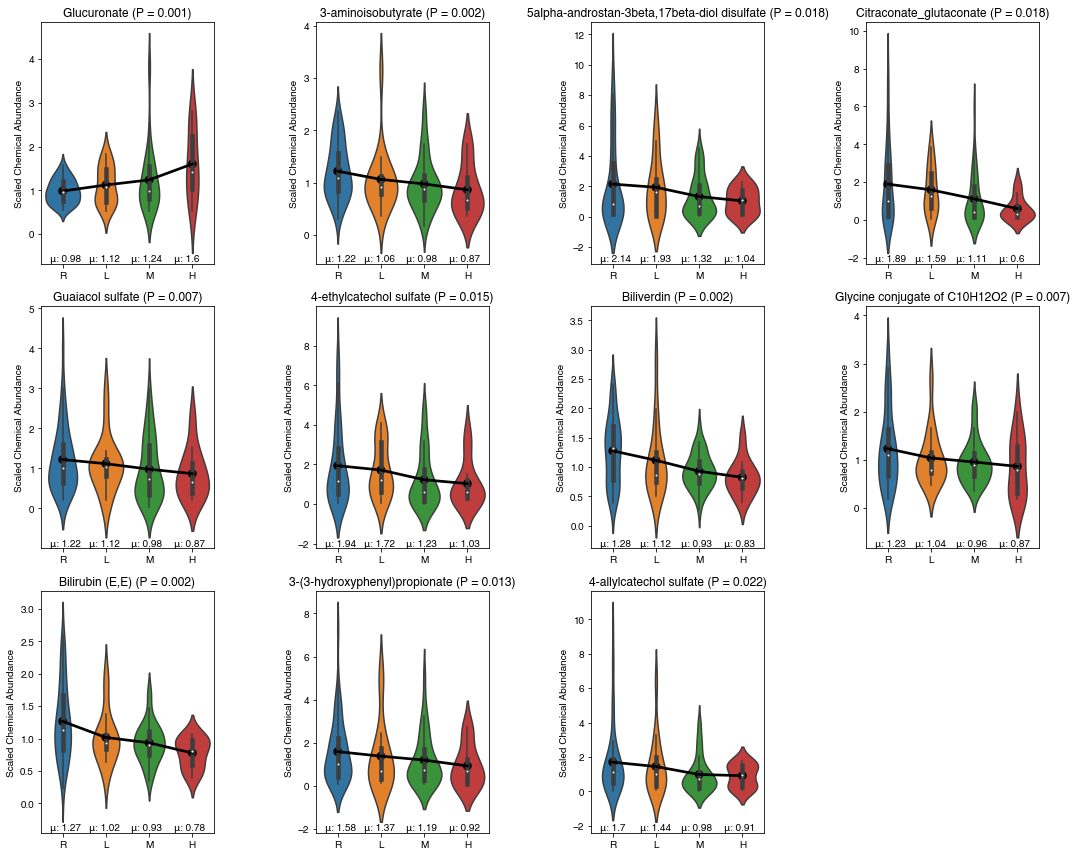

In [67]:
fig, axes = plt.subplots(3, 4, figsize=(15,12))
# axes_cols = (axes.flatten()[::2], axes.flatten()[1::2])
axes_list = [item for sublist in axes for item in sublist] 
output_pdf = '/Users/m221138/RA_plasma_metabolites/analysis/monotonic_change_remove_outlier_zscore2.5/plots/hd4.overall.violinplot.pdf'

for chemID_idx in range(len(selective_chemID_list)):

    ax = axes_list.pop(0)

    chemID = selective_chemID_list[chemID_idx]
    chem_name = selective_chem_list[chemID_idx]
    pvalue = pvalue_list[chemID_idx]
    
    class_list = []
    mean_list = []
    mean_data_dict = {}

    for classID in classID_list:        
        classID_mean = statistics.mean(data_dict[chemID, classID])
        class_list.append(classID)
        mean_list.append(classID_mean)
    print (mean_list)
    mean_data_dict['DAS28'] = class_list
    mean_data_dict['means'] = mean_list
    mean_data_df = pd.DataFrame.from_dict(mean_data_dict)
    
    post_data = '/Users/m221138/RA_plasma_metabolites/analysis/monotonic_change_remove_outlier_zscore2.5/post_data/%s.rm.outlier.txt' % chemID
    post_data_df = pd.read_csv(post_data, sep="\t", header=0)

    sns.violinplot(x="DAS28", y="chemID", ax=ax, data=post_data_df)
    sns.pointplot(x="DAS28", y="means", ax=ax, data=mean_data_df, color="black")
    ax.set(xlabel="", ylabel="Scaled Chemical Abundance")
    ax.set_title('%s (P = %s)' % (chem_name, round(pvalue, 3)))
    
    r_mean = '\u03BC: %s' % round(mean_list[0],2)
    ax.text(0.05, 0.01, r_mean, transform=ax.transAxes)
    l_mean = '\u03BC: %s' % round(mean_list[1],2)
    ax.text(0.28, 0.01, l_mean, transform=ax.transAxes)
    m_mean = '\u03BC: %s' % round(mean_list[2],2)
    ax.text(0.52, 0.01, m_mean, transform=ax.transAxes)
    h_mean = '\u03BC: %s' % round(mean_list[3],2)
    ax.text(0.77, 0.01, h_mean, transform=ax.transAxes)

for ax in axes_list:
    ax.remove()
fig.tight_layout()

fig.get_figure()
fig.savefig(output_pdf)

In [23]:
sns.color_palette()[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)